<div style="text-align: center"><strong>Biniam Abebe</strong> </div>

<div style="text-align: left"><strong>Datasets:</strong> </div>
<br> loan_credit.xlsx

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor, plot_tree
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import matplotlib.pylab as plt
from matplotlib.pyplot import subplots
%matplotlib inline

In [2]:
#Load Data
credit_df=pd.read_excel('loan_credit.xlsx')
credit_df=credit_df.dropna()
credit_df.head()

,Customer ID,Loan Status,Loan Amount,Term,Credit Score,Income,Years_in_job,Home Ownership,Purpose,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,1,Fully Paid,601.0,Short Term,746.0,1512248.0,10.0,Home Mortgage,Debt Consolidation,21297.48,33.0,12,0,390773,1023660,0.0,0
1,2,Fully Paid,605.0,Short Term,736.0,1231922.0,10.0,Home Mortgage,Debt Consolidation,21147.76,17.2,9,0,346921,486926,0.0,0
2,3,Fully Paid,636.0,Short Term,747.0,592496.0,10.0,Home Mortgage,Debt Consolidation,10319.28,24.0,17,0,332956,1208570,0.0,0
3,4,Fully Paid,691.0,Short Term,709.0,558999.0,2.0,Rent,Debt Consolidation,4276.33,9.7,12,0,169613,287122,0.0,0
4,5,Fully Paid,670.0,Short Term,747.0,1640821.0,10.0,Home Mortgage,Debt Consolidation,33636.84,21.8,11,0,1013118,1393194,0.0,0


In [3]:
credit_df['Loan_Dummy']=pd.get_dummies(credit_df['Loan Status'],drop_first=True)
credit_df['Term_Dummy']=pd.get_dummies(credit_df['Term'],drop_first=True)
credit_df.drop(['Customer ID','Loan Status','Term','Home Ownership','Purpose'],axis=1,inplace=True)
credit_df.head()

,Loan Amount,Credit Score,Income,Years_in_job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan_Dummy,Term_Dummy
0,601.0,746.0,1512248.0,10.0,21297.48,33.0,12,0,390773,1023660,0.0,0,1,1
1,605.0,736.0,1231922.0,10.0,21147.76,17.2,9,0,346921,486926,0.0,0,1,1
2,636.0,747.0,592496.0,10.0,10319.28,24.0,17,0,332956,1208570,0.0,0,1,1
3,691.0,709.0,558999.0,2.0,4276.33,9.7,12,0,169613,287122,0.0,0,1,1
4,670.0,747.0,1640821.0,10.0,33636.84,21.8,11,0,1013118,1393194,0.0,0,1,1


In [4]:
credit_df.describe()

,Loan Amount,Credit Score,Income,Years_in_job,Monthly Debt,Years of Credit History,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens,Loan_Dummy,Term_Dummy
count,768.000000,768.000000,7.680000e+02,768.000000,768.000000,768.000000,768.000000,768.000000,7.680000e+02,7.680000e+02,768.000000,768.000000,768.000000,768.000000
mean,372.357568,717.902344,1.418974e+06,6.292969,19091.615872,18.284375,11.394531,0.153646,3.297771e+05,7.699559e+05,0.115885,0.020833,0.798177,0.738281
std,210.341379,29.358497,9.258885e+05,3.475577,12258.086266,6.910366,5.035138,0.398612,4.551217e+05,1.574073e+06,0.343853,0.160128,0.401622,0.439857
min,22.550000,586.000000,2.827010e+05,1.000000,0.000000,4.800000,2.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,200.689500,706.000000,8.639918e+05,3.000000,10749.962500,13.500000,8.000000,0.000000,1.185458e+05,2.838880e+05,0.000000,0.000000,1.000000,0.000000
50%,331.837000,725.000000,1.205265e+06,7.000000,17010.415000,17.000000,11.000000,0.000000,2.150990e+05,4.834060e+05,0.000000,0.000000,1.000000,1.000000
75%,568.133500,740.000000,1.646972e+06,10.000000,24614.737500,21.900000,14.000000,0.000000,3.860088e+05,8.130485e+05,0.000000,0.000000,1.000000,1.000000
max,787.798000,751.000000,1.193742e+07,10.000000,106836.430000,48.800000,48.000000,2.000000,6.506797e+06,2.634333e+07,2.000000,2.000000,1.000000,1.000000


In [5]:
credit_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 998
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Loan Amount                768 non-null    float64
 1   Credit Score               768 non-null    float64
 2   Income                     768 non-null    float64
 3   Years_in_job               768 non-null    float64
 4   Monthly Debt               768 non-null    float64
 5   Years of Credit History    768 non-null    float64
 6   Number of Open Accounts    768 non-null    int64  
 7   Number of Credit Problems  768 non-null    int64  
 8   Current Credit Balance     768 non-null    int64  
 9   Maximum Open Credit        768 non-null    int64  
 10  Bankruptcies               768 non-null    float64
 11  Tax Liens                  768 non-null    int64  
 12  Loan_Dummy                 768 non-null    uint8  
 13  Term_Dummy                 768 non-null    uint8  

<AxesSubplot:xlabel='Income', ylabel='Loan_Dummy'>

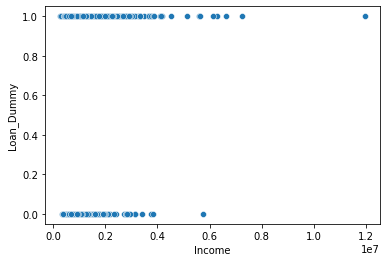

In [6]:
sns.scatterplot(x='Income', y='Loan_Dummy',data=credit_df) #, hue='Term_Dummy')

<AxesSubplot:xlabel='Credit Score', ylabel='Loan Amount'>

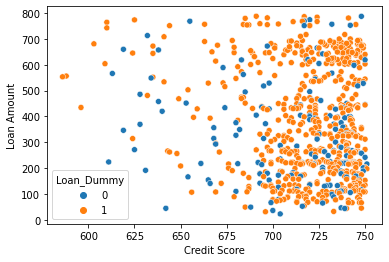

In [7]:
sns.scatterplot(x='Credit Score', y='Loan Amount',data=credit_df, hue='Loan_Dummy')

Text(0.5, 0, 'Income')

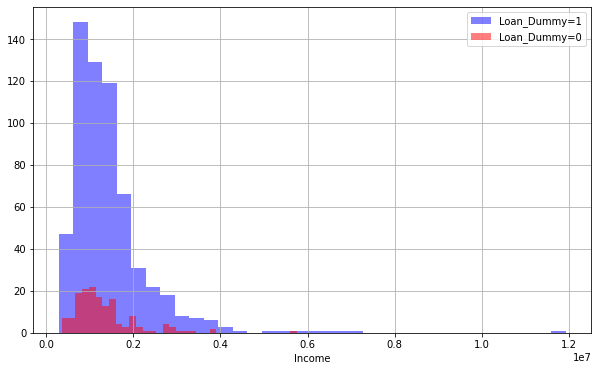

In [8]:
plt.figure(figsize=(10,6))
credit_df[credit_df['Loan_Dummy']==1]['Income'].hist(alpha=0.5,color='blue',
                                                    bins=35,label='Loan_Dummy=1')
credit_df[credit_df['Loan_Dummy']==0]['Income'].hist(alpha=0.5,color='red',
                                                    bins=35,label='Loan_Dummy=0')
plt.legend()
plt.xlabel('Income')

## Decision Tree

In [9]:
X=credit_df.drop(['Loan_Dummy'],axis=1)
y=credit_df['Loan_Dummy']

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.40,random_state=1)

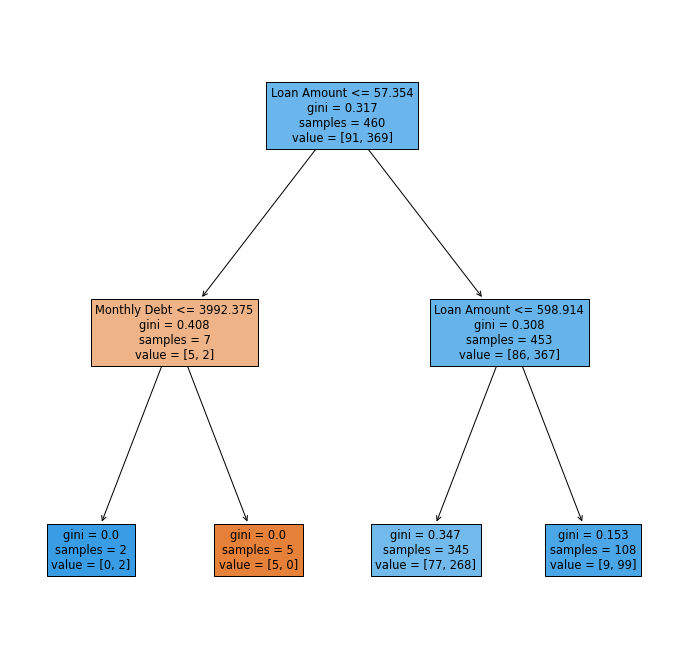

In [11]:
dtree=DecisionTreeClassifier(max_depth=2,random_state=1)
dtree.fit(X_train,y_train)

fig, ax = plt.subplots(figsize=(12, 12))
plot_tree(dtree, filled=True, feature_names=list(X.columns), ax=ax)
plt.show()

In [12]:
#Predictions
predictions=dtree.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[  2  62]
 [  4 240]]


              precision    recall  f1-score   support

           0       0.33      0.03      0.06        64
           1       0.79      0.98      0.88       244

    accuracy                           0.79       308
   macro avg       0.56      0.51      0.47       308
weighted avg       0.70      0.79      0.71       308



# Random Forest

In [14]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier(n_estimators=500,max_depth=2,random_state=1)
rfc.fit(X_train,y_train)

RandomForestClassifier(max_depth=2, n_estimators=500, random_state=1)

In [15]:
#Random Forest predictions
rfc_pred=rfc.predict(X_test)

In [16]:
print(confusion_matrix(y_test,rfc_pred))
print('\n')
print(classification_report(y_test,rfc_pred))

[[  0  64]
 [  0 244]]


              precision    recall  f1-score   support

           0       0.00      0.00      0.00        64
           1       0.79      1.00      0.88       244

    accuracy                           0.79       308
   macro avg       0.40      0.50      0.44       308
weighted avg       0.63      0.79      0.70       308



c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                      feature  importance       std
12                 Term_Dummy    0.009566  0.054621
10               Bankruptcies    0.010017  0.053079
7   Number of Credit Problems    0.014801  0.067300
11                  Tax Liens    0.019460  0.087641
3                Years_in_job    0.028779  0.096521
6     Number of Open Accounts    0.070007  0.156958
8      Current Credit Balance    0.079475  0.168003
9         Maximum Open Credit    0.091374  0.186964
4                Monthly Debt    0.092374  0.181796
2                      Income    0.103320  0.197587
5     Years of Credit History    0.108956  0.206903
1                Credit Score    0.146803  0.233604
0                 Loan Amount    0.225066  0.294311


<function matplotlib.pyplot.show(close=None, block=None)>

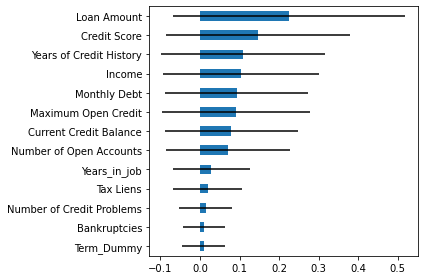

In [17]:
importances=rfc.feature_importances_
std=np.std([tree.feature_importances_ for tree in rfc.estimators_],axis=0)

df=pd.DataFrame({'feature':X_train.columns,'importance':importances,'std':std})
df=df.sort_values('importance')
print(df)

ax=df.plot(kind='barh',xerr='std', x='feature',legend=False)
ax.set_ylabel('')

plt.tight_layout()
plt.show

In [20]:
print("""B.What is the accuracy score with the first decision tree? What does it mean?""")
print("""C.What is the accuracy score with the random forest application? What does it mean? Which model (B or C) is better according to the accuracy scores?""")


B.What is the accuracy score with the first decision tree? What does it mean?
C.What is the accuracy score with the random forest application? What does it mean? Which model (B or C) is better according to the accuracy scores?
